# Start out with 'Serial Input - an Example' to understand the process
Use this code as a starting point to pull in serial data once you know how things work.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
import serial
import serial.tools.list_ports

## Make sure the Arduino is plugged in and available

If the IDE and/or the serial monitor are open, Jupyter may not be able to get access to the serial port. Run the cell to see a list of serial ports, then use the right format in the next cell to open the port you have the arduino plugged into.

In [2]:
# Show a list of existing serial ports so you can decide what to open
ports = list(serial.tools.list_ports.comports())
for p in ports:
    print(p)

/dev/cu.wlan-debug - n/a
/dev/cu.Bluetooth-Incoming-Port - n/a
/dev/cu.usbmodem22401 - Feather M0
/dev/cu.usbmodem22301 - ItsyBitsy M0 Express
/dev/cu.usbmodem109NTDVPZ9622 - USB Controls


In [3]:
# Serial port must not be in use by another application, or complex errors will show up
# Be sure the Arduino serial monitor is closed before you run this cell!
#ser = serial.Serial('/dev/cu.usbmodemFD14131',115200,timeout=1)
#ser = serial.Serial('/dev/cu.usbmodem1A1321',115200,timeout=1)
#ser = serial.Serial('/dev/cu.usbmodem1411',115200,timeout=1)
#ser = serial.Serial('/dev/cu.usbmodemFD1461',115200,timeout=1)
ser = serial.Serial('/dev/cu.usbmodem22401',115200,timeout=1)
#ser = serial.Serial('COM3',115200,timeout=1)

In [4]:
def catchUp():   # get rid of any data lying around the serial buffer
    while ser.in_waiting > 100:  # read just about everything that's there
        ser.reset_input_buffer()   # throwaway everything in the buffer
        ser.readline()
    ser.readline()
    
catchUp()
print("done")

done


[['3582.636' '   5.9392' '   0.3432']
 ['3582.637' '   5.9396' '   0.3421']
 ['3582.638' '   5.9400' '   0.3410']]


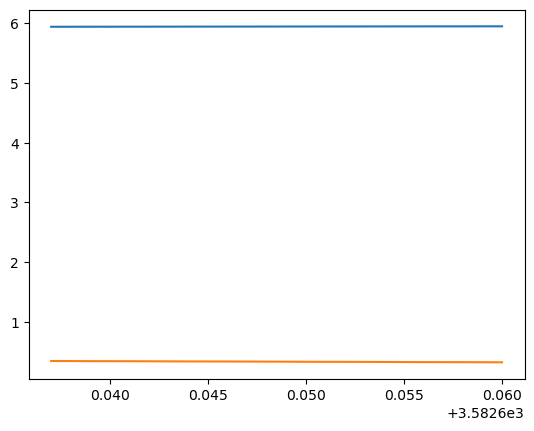

In [6]:
lines = 20   # the number of lines you want to read from the arduino
a = []        # a[] is just a list for now...

catchUp()

# read in a whole lot of lines from the serial port and append them to a[]
for i in range(0,lines+1):
    #read, then decode into simple ASCII, strip off whitespace and split at commas
    a.append(ser.readline().decode("utf-8").strip().split(','))
    
a = np.asarray(a)                              # convert a[] into an np.array of strings
print(a[:3,:])                                 # print a few lines to be sure it worked  
d = np.asfarray(a[1:,1:])                      # slice to get the data columns as floats
micros = np.asfarray(a[1:,0],dtype=np.uint32)  # and the first column as time in unsigned 32 bit
plt.plot(micros,d[:,0],micros,d[:,1])

In [7]:
print(ser.isOpen())

True


In [8]:
ser.close()